In [1]:
import warnings
warnings.filterwarnings('ignore')
# For ignoring warnings printed by R magic commands

In [2]:
import os
import glob

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [4]:
# Load R magic
%load_ext rpy2.ipython
# Import ggplot2
%R require(ggplot2);

In [5]:
%%R 
plotTheme <- theme(legend.title=element_blank(), legend.position="top", legend.text=element_text(size=6))

In [18]:
directory = '../../../results/benchmarks/header-sizes/'

In [21]:
df = pd.read_csv(directory + 'header_sizes.csv')

In [22]:
df

,numHeaders,Size (bytes)
0,0,128
1,5,184
2,10,234
3,15,290
4,20,340
5,25,396
6,30,446


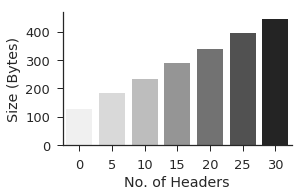

In [15]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Size (bytes)', data=df, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Size (Bytes)')
# plt.savefig('header-sizes.pdf')
plt.show()

In [50]:
# substracting rest of the rows with first row
plot_df = pd.DataFrame()
plot_df['numHeaders'] = pd.Series(list(df[df['numHeaders'] != 0]['numHeaders']))
plot_df['Size (bytes)'] = pd.Series(list(df[df['numHeaders'] != 0]['Size (bytes)'])) - int(df[df['numHeaders'] == 0]['Size (bytes)'])

In [51]:
plot_df

,numHeaders,Size (bytes)
0,5,56
1,10,106
2,15,162
3,20,212
4,25,268
5,30,318


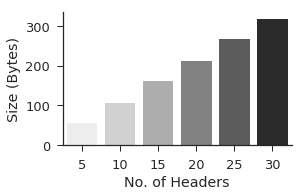

In [53]:
sns.set(style='ticks', font_scale=1.3, rc={"lines.linewidth": 0.9})
ax = sns.factorplot(x='numHeaders', y='Size (bytes)', data=plot_df, palette="Greys",
                   size=3, kind="bar", legend=True, legend_out=False, aspect=1.5, ci='sd')
ax.set(xlabel='No. of Headers', ylabel='Size (Bytes)')
plt.savefig('header-sizes.pdf')
plt.show()